In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [3]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"


#### Document last run date

In [4]:
print('TIMESTAMP for last run of this script:')
print(dt.datetime.utcnow())

TIMESTAMP for last run of this script:
2018-03-19 21:28:36.987432


#### Current runs for implementation

In [13]:
runs = [
    'run_0069'
]

#### Check that all run files are up-to-date

In [14]:
for r in runs:
    run = RunManager('StatArbStrategy', r, test_periods=0)
    run.import_return_frame()
    print('{} - {}'.format(r, run.returns.index[-1]))

run_0069 - 2018-03-16 00:00:00


#### Import

In [15]:
drop_params = []

comb = CombinationSearch(write_flag=True)
comb.params['training_epochs'] = 20

for r in runs:
    comb.add_run(RunManager('StatArbStrategy', r, 
                            test_periods=0, start_year=2009, drop_params=drop_params))

In [16]:
comb.start()

Reading and aggregating runs...
Finished aggregating runs...

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Writing run as: CombinationSearch_20180319213630
Max date: 2018-03-16
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



100%|██████████| 20/20 [03:49<00:00, 12.34s/it]


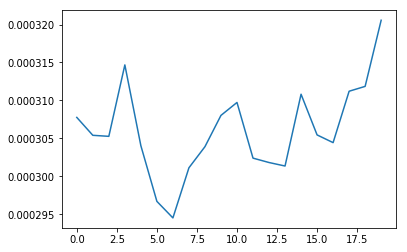

In [17]:
plt.figure()
plt.plot(comb.epoch_stats.Mean)
plt.show()

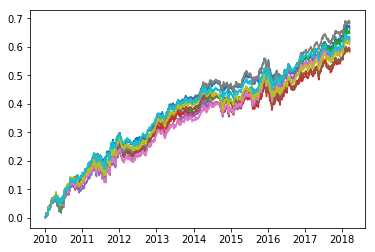

In [18]:
plt.figure()
plt.plot(comb.best_results_returns.cumsum())
plt.show()

In [19]:
df = rollup_returns(comb.best_results_returns)
df['year'] = df.sum(axis=1)
df

Qtr,1,2,3,4,year
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.069865,-0.005338,0.071163,0.013897,0.149587
2011,0.049939,0.021358,-0.005764,0.077043,0.142576
2012,-0.022192,0.008211,0.009315,0.062200,0.057533
2013,-0.003058,0.043737,0.022149,0.005148,0.067976
2014,0.046084,-0.000405,-0.015739,0.009122,0.039061
2015,0.008519,0.031261,-0.019524,0.066861,0.087118
2016,-0.030027,0.001841,-0.003479,0.042126,0.010460
2017,0.017954,0.038278,-0.006880,0.031231,0.080582


In [20]:
df.year.mean()

0.073551148268880845